check and drop outliers
categorical to numeric(one-hot or label)
check and drop features with low corr again after encoding
standartscaler(quantitle transformer)

In [202]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import torch
import sys
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler, Sampler
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader, random_split

In [203]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
origin_train = train_df.copy()
origin_test = test_df.copy()
train_Id = train_df['Id']
test_Id = test_df['Id']
droped_columns = []
for dataset in [train_df, test_df]:
    dataset.drop(['Id'], inplace=True, axis=1)
droped_columns.append(['Id'])

In [204]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [205]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [206]:
train_df.shape

(1460, 80)

In [207]:
test_df.shape

(1459, 79)

In [208]:
data_corr = train_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
data_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [209]:
train_df.shape

(1460, 80)

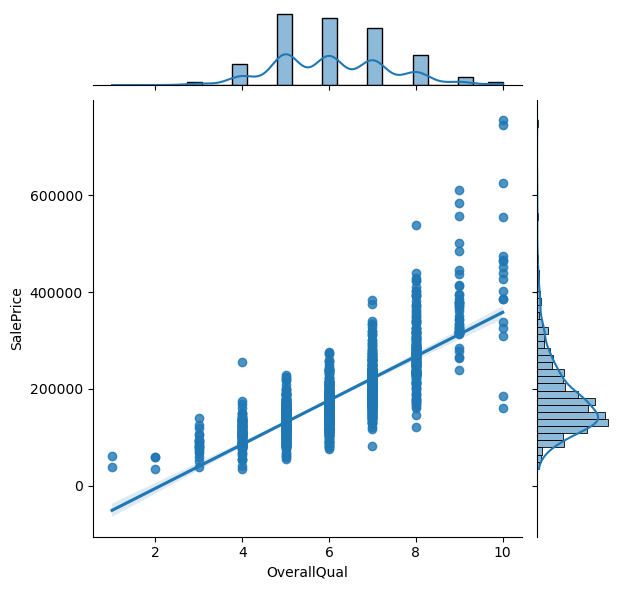

In [210]:
sns.jointplot(x=train_df['OverallQual'], y=train_df['SalePrice'], kind='reg')

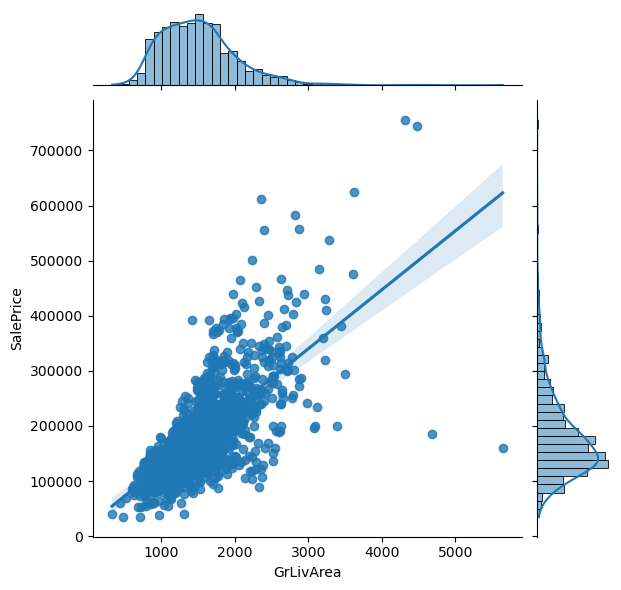

In [211]:
sns.jointplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], kind='reg')

In [212]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) 
                         & (train_df['SalePrice']<300000)].index).reset_index(drop=True)

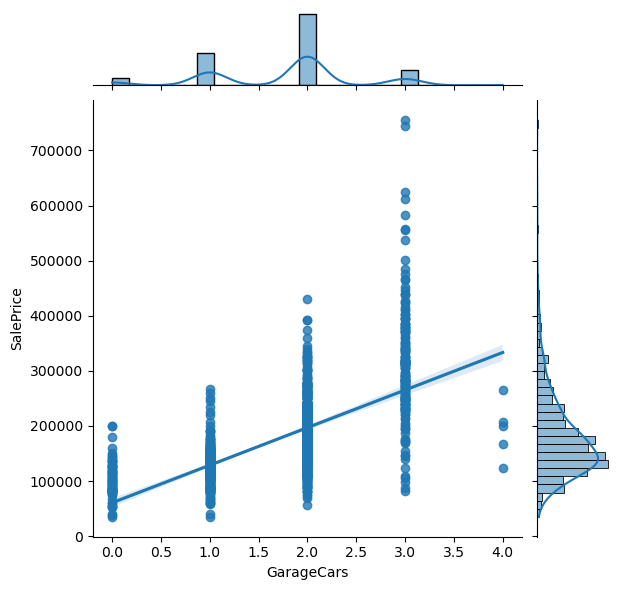

In [213]:
sns.jointplot(x=train_df['GarageCars'], y=train_df['SalePrice'], kind='reg')


In [214]:
train_df = train_df.drop(train_df[(train_df['GarageCars'] > 3.5) & (train_df['SalePrice'] < 300000)].index).reset_index(drop=True)

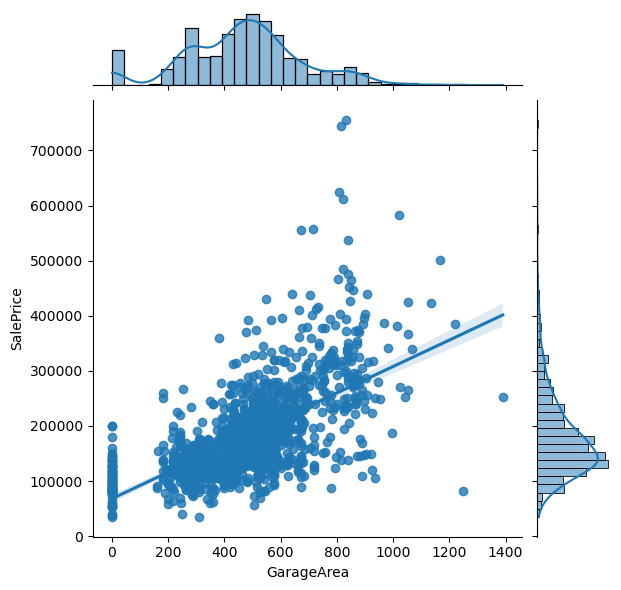

In [215]:
sns.jointplot(x=train_df['GarageArea'], y=train_df['SalePrice'], kind='reg')

In [216]:
train_df = train_df.drop(train_df[(train_df['GarageArea'] > 1000) & (train_df['SalePrice'] < 300000)].index).reset_index(drop=True)

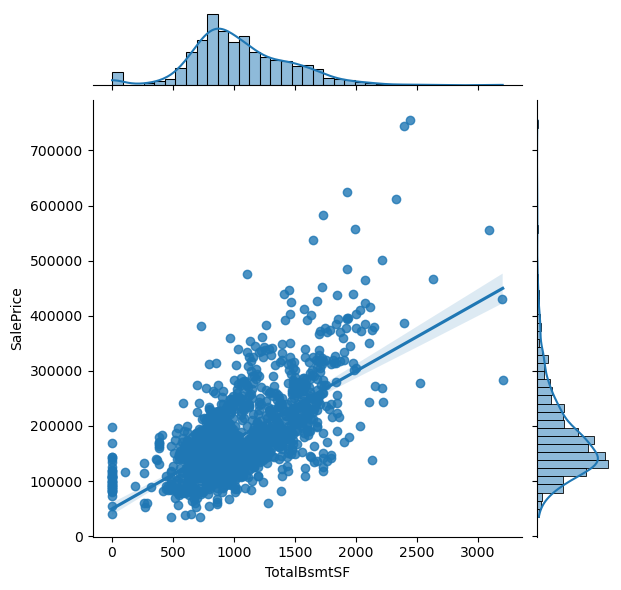

In [217]:
sns.jointplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'], kind='reg')

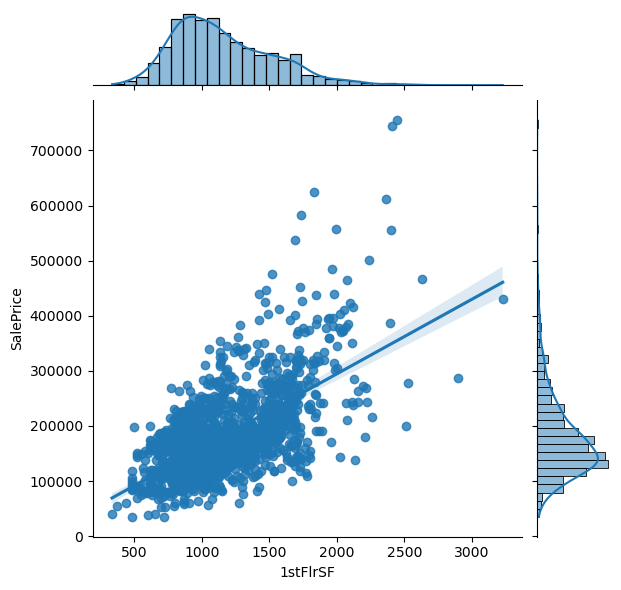

In [218]:
sns.jointplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'], kind='reg')

In [219]:
missing_values = train_df.isnull().sum()
col_miss = missing_values[missing_values > 0].index
missing_values[missing_values > 0].sort_values()



Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      258
FireplaceQu      686
MasVnrType       866
Fence           1168
Alley           1358
MiscFeature     1395
PoolQC          1442
dtype: int64

In [220]:
neighborhood_means = train_df.groupby('Neighborhood')['LotFrontage'].mean()
bathfull_median = train_df['BsmtFullBath'].median()
bathhalf_median = train_df['BsmtHalfBath'].median()
MasVnrArea_mode = dataset['MasVnrArea'].mode()[0]
MSZoning_mode = train_df['MSZoning'].mode()[0]
Utilities_mode = train_df['Utilities'].mode()[0]
Functional_mode = train_df['Functional'].mode()[0]
Exterior1st_mode = train_df['Exterior1st'].mode()[0]
Exterior2nd_mode = train_df['Exterior2nd'].mode()[0]
SaleType_mode = train_df['SaleType'].mode()[0]
for dataset in [train_df, test_df]:
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
    dataset['YrSold'] = dataset['YrSold'].apply(str)
    dataset['MoSold'] = dataset['MoSold'].apply(str)

    dataset['PoolQC'] = dataset['PoolQC'].fillna('None')
    dataset['MiscFeature'] = dataset['MiscFeature'].fillna('None')
    dataset['Alley'] = dataset['Alley'].fillna('None')
    dataset['Fence'] = dataset['Fence'].fillna('None')
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('None')
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        dataset[col] = dataset[col].fillna('None')
    for col in ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtExposure', 'BsmtCond']:
        dataset[col] = dataset[col].fillna('None')
    dataset.drop(['GarageYrBlt'], inplace=True, axis=1)
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(MasVnrArea_mode)
    dataset['MSZoning'] = dataset['MSZoning'].fillna(MSZoning_mode)
    dataset['Utilities'] = dataset['Utilities'].fillna(Utilities_mode)
    dataset['Functional'] = dataset['Functional'].fillna(Functional_mode)
    dataset['Exterior1st'] = dataset['Functional'].fillna(Exterior1st_mode)
    dataset['Exterior2nd'] = dataset['Functional'].fillna(Exterior2nd_mode)
    dataset['SaleType'] = dataset['SaleType'].fillna(SaleType_mode)
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna('TA')
    for col in ['GarageCars', 'GarageArea']:
        dataset[col] = dataset[col].fillna(0)
    for col in ['BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1']:
        dataset[col] = dataset[col].fillna(0)
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['Neighborhood'].map(neighborhood_means))
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(bathhalf_median)
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(bathfull_median)
    dataset['Electrical'] = dataset['Electrical'].fillna('SBrkr')
    



In [221]:
missed = train_df.isna().sum()
missed[missed>0].sort_values()

Series([], dtype: int64)

In [222]:
missed = test_df.isna().sum()
missed[missed>0].sort_values()

Series([], dtype: int64)


3 one-hot encoding 
4 standard scaler
5 base models
6 boosting
7 cv and maybe stratify
8 grid for best model
9 submission
10 neural network

In [223]:
numeric_features = [col for col in train_df.columns if train_df[col].dtype != object]
cat_features = [col for col in train_df.columns if train_df[col].dtype == object]
numeric_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [224]:
asymmetrical_col = []
for col in numeric_features:
    if abs(train_df[col].skew()) > 1 or abs(train_df[col].kurt()) > 3:
        print('{:15}'.format(col), 
            'Skewness: {:05.2f}'.format(train_df[col].skew()), 
            '   ',
            'Kurtosis: {:06.2f}'.format(train_df[col].kurt()))
        asymmetrical_col.append(col)
asymmetrical_col.remove('GrLivArea')
asymmetrical_col.remove('WoodDeckSF')
asymmetrical_col.remove('SalePrice')



LotFrontage     Skewness: 01.51     Kurtosis: 013.21
LotArea         Skewness: 12.60     Kurtosis: 213.93
MasVnrArea      Skewness: 02.70     Kurtosis: 010.43
BsmtFinSF2      Skewness: 04.24     Kurtosis: 019.92
LowQualFinSF    Skewness: 08.97     Kurtosis: 082.51
GrLivArea       Skewness: 01.02     Kurtosis: 002.12
BsmtHalfBath    Skewness: 04.12     Kurtosis: 016.52
KitchenAbvGr    Skewness: 04.55     Kurtosis: 022.23
WoodDeckSF      Skewness: 01.55     Kurtosis: 003.04
OpenPorchSF     Skewness: 02.33     Kurtosis: 008.43
EnclosedPorch   Skewness: 03.05     Kurtosis: 010.13
3SsnPorch       Skewness: 10.26     Kurtosis: 122.61
ScreenPorch     Skewness: 04.10     Kurtosis: 018.25
PoolArea        Skewness: 15.89     Kurtosis: 255.95
MiscVal         Skewness: 24.40     Kurtosis: 696.36
SalePrice       Skewness: 01.89     Kurtosis: 006.57


In [225]:
unique_val = train_df[asymmetrical_col].nunique()
unique_val = unique_val[unique_val > 15].index
for dataset in [train_df, test_df]:
    for col in unique_val:
        dataset[col] = np.log1p(dataset[col])

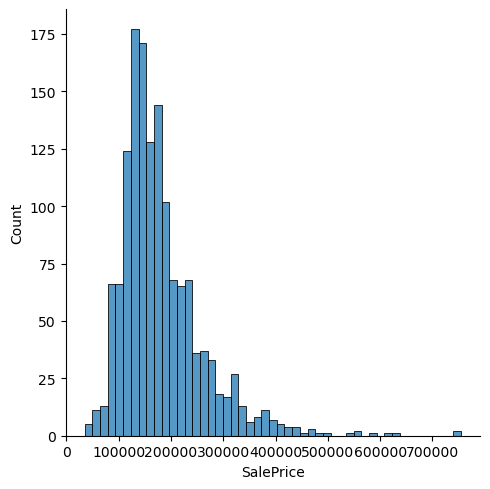

In [226]:
sns.displot(train_df['SalePrice'])

In [227]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1443    12.072547
1444    12.254868
1445    12.493133
1446    11.864469
1447    11.901590
Name: SalePrice, Length: 1448, dtype: float64

In [228]:
train_df.head(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0.000000,2,2008,WD,Normal,12.247699
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0.000000,5,2007,WD,Normal,12.109016
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0.000000,9,2008,WD,Normal,12.317171
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0.000000,2,2006,WD,Abnorml,11.849405
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0.000000,12,2008,WD,Normal,12.429220
5,50,RL,4.454347,9.555064,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,Shed,6.552508,10,2009,WD,Normal,11.870607


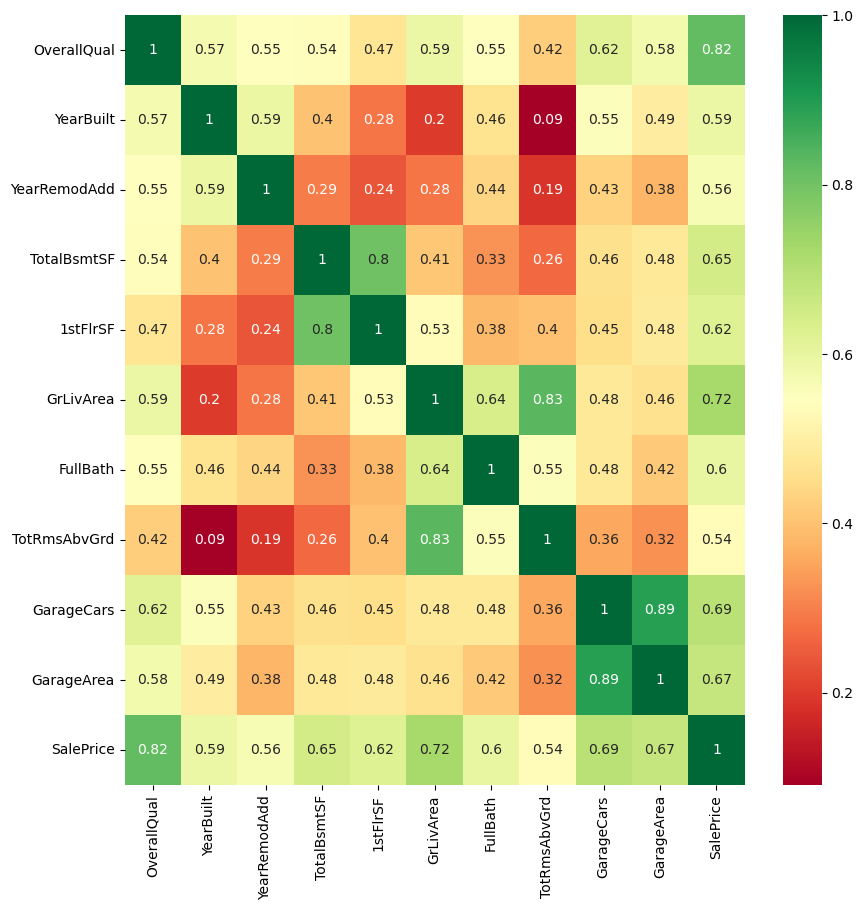

In [229]:
corrmat = train_df[numeric_features].corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [230]:
for dataset in [train_df, test_df]:
    dataset.drop(['GarageCars'], inplace=True, axis=1)

In [231]:
train_df.shape

(1448, 78)

In [232]:
test_df.shape

(1459, 77)

In [233]:
combined_df = pd.concat([train_df, test_df], axis=0)
dummy_combined = pd.get_dummies(combined_df[cat_features], drop_first=True, dtype=int)
train_size = len(train_df)
train_dummies = dummy_combined.iloc[:train_size, :]
test_dummies = dummy_combined.iloc[train_size:, :]
train_df = pd.concat([train_df, train_dummies], axis=1)
test_df = pd.concat([test_df, test_dummies], axis=1)
train_df = train_df.drop(columns=cat_features)
test_df = test_df.drop(columns=cat_features)

In [234]:
train_df.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,5,2003,2003,5.283204,706,0.0,150,...,0,0,0,0,1,0,0,0,1,0
1,4.394449,9.169623,6,8,1976,1976,0.000000,978,0.0,284,...,0,0,0,0,1,0,0,0,1,0
2,4.234107,9.328212,7,5,2001,2002,5.093750,486,0.0,434,...,0,0,0,0,1,0,0,0,1,0
3,4.110874,9.164401,7,5,1915,1970,0.000000,216,0.0,540,...,0,0,0,0,1,0,0,0,0,0
4,4.442651,9.565284,8,5,2000,2000,5.860786,655,0.0,490,...,0,0,0,0,1,0,0,0,1,0


In [235]:
train_df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,...,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,4.221239,9.106660,6.093232,5.580110,1971.200276,1984.803177,2.113478,439.808011,0.660830,564.678867,...,0.003453,0.003453,0.081492,0.002072,0.870166,0.002762,0.007597,0.013812,0.822514,0.083564
std,0.320435,0.513806,1.372152,1.114306,30.122669,20.643030,2.624658,432.366648,1.851710,440.338925,...,0.058681,0.058681,0.273683,0.045486,0.336237,0.052504,0.086857,0.116751,0.382212,0.276828
min,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.110874,8.926283,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,222.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.262680,9.154775,6.000000,5.000000,1972.500000,1993.500000,0.000000,384.000000,0.000000,474.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.394449,9.355457,7.000000,6.000000,2000.000000,2004.000000,5.101386,712.000000,0.000000,803.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,2188.000000,7.296413,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
target = train_df['SalePrice']
train_df.drop(['SalePrice'], inplace=True, axis=1)

In [237]:
train_df.shape

(1448, 266)

In [238]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)
pd.DataFrame(train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,-0.098600,-0.125810,0.661065,-0.520782,1.056039,0.881804,1.208089,0.615875,-0.356999,-0.942052,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
1,0.540734,0.122584,-0.067969,2.172407,0.159394,-0.426595,-0.805518,1.245188,-0.356999,-0.637636,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
2,0.040171,0.431347,0.661065,-0.520782,0.989621,0.833345,1.135882,0.106872,-0.356999,-0.296871,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
3,-0.344541,0.112418,0.661065,-0.520782,-1.866358,-0.717351,-0.805518,-0.517814,-0.356999,-0.056065,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,-2.152729,-0.301965
4,0.691213,0.892909,1.390099,-0.520782,0.956412,0.736426,1.428226,0.497879,-0.356999,-0.169653,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,-0.243828,-0.252645,-0.067969,-0.520782,0.923203,0.736426,-0.805518,-1.017562,-0.356999,0.882173,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
1444,0.727726,0.738846,-0.067969,0.376947,0.225812,0.154916,1.019157,0.810222,2.398092,0.055252,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
1445,-0.051654,0.006009,0.661065,3.070137,-1.002923,1.027182,-0.805518,-0.381308,-0.356999,0.709519,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965
1446,0.040171,0.146167,-0.797003,0.376947,-0.704041,0.542590,-0.805518,-0.904193,3.390733,-1.282816,...,-0.058864,-0.058864,-0.297862,-0.045565,0.386272,-0.052632,-0.087492,-0.118345,0.464527,-0.301965


In [239]:
train_scaled = train_scaled.round(4)
test_scaled = test_scaled.round(4)

In [240]:
pd.DataFrame(train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,-0.0986,-0.1258,0.6611,-0.5208,1.0560,0.8818,1.2081,0.6159,-0.3570,-0.9421,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302
1,0.5407,0.1226,-0.0680,2.1724,0.1594,-0.4266,-0.8055,1.2452,-0.3570,-0.6376,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302
2,0.0402,0.4313,0.6611,-0.5208,0.9896,0.8333,1.1359,0.1069,-0.3570,-0.2969,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302
3,-0.3445,0.1124,0.6611,-0.5208,-1.8664,-0.7174,-0.8055,-0.5178,-0.3570,-0.0561,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,-2.1527,-0.302
4,0.6912,0.8929,1.3901,-0.5208,0.9564,0.7364,1.4282,0.4979,-0.3570,-0.1697,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,-0.2438,-0.2526,-0.0680,-0.5208,0.9232,0.7364,-0.8055,-1.0176,-0.3570,0.8822,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302
1444,0.7277,0.7388,-0.0680,0.3769,0.2258,0.1549,1.0192,0.8102,2.3981,0.0553,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302
1445,-0.0517,0.0060,0.6611,3.0701,-1.0029,1.0272,-0.8055,-0.3813,-0.3570,0.7095,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302
1446,0.0402,0.1462,-0.7970,0.3769,-0.7040,0.5426,-0.8055,-0.9042,3.3907,-1.2828,...,-0.0589,-0.0589,-0.2979,-0.0456,0.3863,-0.0526,-0.0875,-0.1183,0.4645,-0.302


In [241]:
model = LinearRegression()
model.fit(train_df, target)
scores = cross_val_score(model, train_scaled, target, cv=4, scoring='neg_root_mean_squared_error')
print(scores, scores.std(), scores.mean())

[-0.11969416 -0.13521422 -0.11288738 -0.11629774] 0.00853921838309347 -0.12102337375359354


In [242]:
def search_hp(X, y, model, param_grid, param_scale=None):
    
    CV_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=5,
                            scoring='neg_root_mean_squared_error',
                            n_jobs=1,
                            verbose=0)
    CV_model.fit(X, y)
   
    return CV_model.best_score_, CV_model.best_estimator_, CV_model.cv_results_, CV_model.best_params_

In [243]:
def search_hp_random(X, y, model, param_grid, n_iter=15, cv=3):
    y_binned = pd.qcut(y, q=5, labels=False, duplicates='drop')
    skf = KFold(n_splits=cv, shuffle=True, random_state=42)
        
    random_search = RandomizedSearchCV(model,
                                        param_grid,
                                        n_iter=n_iter,          
                                        cv=skf,                  
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42,
                                        n_jobs=1,                
                                        verbose=1,
                                        refit=True)
    random_search.fit(X, y)                                
    return (random_search.best_score_, 
            random_search.best_estimator_,
            random_search.cv_results_,
            random_search.best_params_)                                      

In [244]:
# model5 = CatBoostRegressor(
#     early_stopping_rounds=150,
#     od_type='Iter',
#     random_seed=42,
#     verbose=0
# )
# param_grid = {
#     'iterations': [2000, 3000, 5000], 
#     'learning_rate': np.linspace(0.01, 0.1, 10),
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': np.logspace(0, 1, 10), 
#     'border_count': [64, 128, 254],
# }

# best_score, best_estimator, cv_results, best_params = search_hp_random(train_df, target, model5, param_grid)
# print(best_score, best_estimator, cv_results, best_params)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


KeyboardInterrupt: 

In [ ]:
# model2 = RandomForestRegressor(bootstrap=False, max_depth=25, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

In [ ]:
# model3 = XGBRegressor(colsample_bytree=0.8,
#   gamma=0,
#   learning_rate=0.05,
#   max_depth=4,
#   min_child_weight=3,
#   n_estimators=400,
#   reg_alpha=0,
#   reg_lambda=1,
#   subsample=0.9,
#   tree_method='hist')

In [ ]:
# model4 = Ridge(alpha=10)

In [ ]:
# model5 = CatBoostRegressor(random_seed=42, verbose=0, 
#                             early_stopping_rounds=50, 
#                             border_count=128, 
#                             depth=6, iterations=1500, 
#                             l2_leaf_reg=3, learning_rate=0.03)

In [ ]:
# model6 = LGBMRegressor(max_depth=3, min_child_samples=10, n_estimators=300, n_jobs=-1,
#               num_leaves=np.int64(130), random_seed=42, reg_alpha=0.01,
#               reg_lambda=0.1, subsample=0.6)

In [ ]:
# model7 = CatBoostRegressor(
#     learning_rate = np.float64(0.09000000000000001), 
#     l2_leaf_reg = np.float64(2.154434690031884), 
#     iterations = 2000, depth = 4, border_count = 128
# )

In [ ]:
# params = {'iterations': 6000,
#           'learning_rate': 0.005,
#           'depth': 4,
#           'l2_leaf_reg': 1,
#           'eval_metric':'RMSE',
#           'early_stopping_rounds': 200,
#           'verbose': 200,
#           'random_seed': 42}
# model8 = CatBoostRegressor(**params)
# model8.fit(train_df, target)


In [ ]:
# pred = model8.predict(test_df)
# submission = pd.DataFrame(test_Id, columns = ['Id'])
# test_pred = np.expm1(pred)
# submission['SalePrice'] = test_pred 
# submission.head()
# submission.to_csv("result.csv", index = False, header = True)

In [245]:
print("=" * 60)
print("ПРОВЕРКА ДАННЫХ ПЕРЕД ОБУЧЕНИЕМ")
print("=" * 60)

# 1. Проверяем размерности
print(f"Размер входа (input_size): {input_size}")
print(f"Batch size: {train_loader.batch_size}")

# 2. Берем один batch из train_loader
train_iter = iter(train_loader)
x_batch, y_batch = next(train_iter)

print(f"\nРазмер batch X: {x_batch.shape}")  # Должно быть [batch_size, input_size]
print(f"Размер batch y: {y_batch.shape}")    # Должно быть [batch_size, 1]

# 3. Проверяем статистики X
print(f"\n--- Статистики признаков (X) ---")
print(f"Min: {x_batch.min().item():.4f}")
print(f"Max: {x_batch.max().item():.4f}")
print(f"Mean: {x_batch.mean().item():.4f}")
print(f"Std: {x_batch.std().item():.4f}")

# 4. Проверяем статистики y (ЦЕЛЕВАЯ ПЕРЕМЕННАЯ - САМОЕ ВАЖНОЕ!)
print(f"\n--- Статистики целевой переменной (y) ---")
print(f"Min: {y_batch.min().item():.4f}")
print(f"Max: {y_batch.max().item():.4f}")
print(f"Mean: {y_batch.mean().item():.4f}")
print(f"Std: {y_batch.std().item():.4f}")

# 5. Показываем первые 5 значений y
print(f"\nПервые 5 значений y:")
for i in range(min(5, len(y_batch))):
    print(f"  y[{i}] = {y_batch[i].item():.6f}")

# 6. Что будет после expm1? (если y в логарифмах)
print(f"\n--- Если y в логарифмах (log(y+1)) ---")
print("После torch.expm1(y):")
for i in range(min(3, len(y_batch))):
    y_val = y_batch[i].item()
    expm1_val = torch.expm1(y_batch[i]).item()
    print(f"  y={y_val:.6f} → expm1(y)={expm1_val:.2f}")

# 7. Проверяем масштабы
print(f"\n--- Анализ масштабов ---")
y_std = y_batch.std().item()
if y_std > 100:
    print(f"⚠️  ВНИМАНИЕ: Std(y) = {y_std:.2f} - ОЧЕНЬ большое!")
    print("   Нужна нормализация!")
elif y_std > 10:
    print(f"⚠️  Std(y) = {y_std:.2f} - довольно большое")
    print("   Рекомендуется нормализация")
else:
    print(f"✓ Std(y) = {y_std:.2f} - нормальный масштаб")

# 8. Проверяем архитектуру модели
print(f"\n--- Архитектура модели ---")
print(f"Количество слоёв: {len(model_nn)}")
print(f"Общее число параметров: {sum(p.numel() for p in model_nn.parameters()):,}")
print("Слои:")
for i, layer in enumerate(model_nn):
    print(f"  {i}: {layer.__class__.__name__}")

print("\n" + "=" * 60)

ПРОВЕРКА ДАННЫХ ПЕРЕД ОБУЧЕНИЕМ
Размер входа (input_size): 266
Batch size: 32

Размер batch X: torch.Size([32, 266])
Размер batch y: torch.Size([32, 1])

--- Статистики признаков (X) ---
Min: 0.0000
Max: 3228.0000
Mean: 36.3231
Std: 234.1336

--- Статистики целевой переменной (y) ---
Min: 10.5967
Max: 12.9715
Mean: 11.9781
Std: 0.4667

Первые 5 значений y:
  y[0] = 11.904974
  y[1] = 11.808822
  y[2] = 11.561726
  y[3] = 12.001512
  y[4] = 11.512936

--- Если y в логарифмах (log(y+1)) ---
После torch.expm1(y):
  y=11.904974 → expm1(y)=147999.95
  y=11.808822 → expm1(y)=134432.06
  y=11.561726 → expm1(y)=105000.05

--- Анализ масштабов ---
✓ Std(y) = 0.47 - нормальный масштаб

--- Архитектура модели ---
Количество слоёв: 13
Общее число параметров: 110,465
Слои:
  0: Linear
  1: BatchNorm1d
  2: ReLU
  3: Dropout
  4: Linear
  5: BatchNorm1d
  6: ReLU
  7: Dropout
  8: Linear
  9: BatchNorm1d
  10: ReLU
  11: Dropout
  12: Linear



In [279]:
def data_for_nn(X, y, test, batch_size):
    train_sample_np = X.values
    target_sample_np = y.values.reshape(-1, 1)
    test_sample_np = test.values

    input_size = X.shape[1]

    train_tensor = torch.tensor(train_sample_np, dtype=torch.float)
    target_tensor = torch.tensor(target_sample_np,  dtype=torch.float)
    test_tensor = torch.tensor(test_sample_np, dtype=torch.float)

    dataset = TensorDataset(train_tensor, target_tensor)
    train_data, val_data = random_split(dataset, [0.8, 0.2])

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_tensor, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    return train_loader, test_tensor, val_loader, input_size

train_loader, test_tensor, val_loader, input_size = data_for_nn(train_df, target, test_df, batch_size=32)

In [270]:
def train_model_nn(model, train_loader, val_loader, loss_fn, optimizer, num_epochs):   
    train_history = []
    val_history = []

    lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5, verbose=True)
    

    for epoch in range(num_epochs):
        model.train() 
        for x, y in train_loader:
            prediction_log = model(x)   
            loss_mse = loss_fn(prediction_log, y)

            optimizer.zero_grad()
            loss_mse.backward()
            optimizer.step()
            rmse_train = torch.sqrt(loss_mse).item()
         

        train_history.append(rmse_train)

        model.eval()
        
        with torch.no_grad():
            for x, y in val_loader:
                prediction_log = model(x)
                loss_mse = loss_fn(prediction_log, y)
                rmse_train = torch.sqrt(loss_mse).item()

            val_history.append(rmse_train)
        lr_scheduler.step(loss_mse)     

    return train_history, val_history



In [271]:
model_nn = nn.Sequential(
        nn.Linear(input_size, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),

        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(inplace=True),
        nn.Dropout(0.3),

        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(inplace=True),
        nn.Dropout(0.2),

        nn.Linear(64, 1)
)
optimizer = optim.Adam(model_nn.parameters(), lr=1e-3, weight_decay=1e-5)
loss = nn.MSELoss().type(torch.FloatTensor)
train_history, val_history = train_model_nn(model_nn, train_loader, val_loader, loss, optimizer, 200)

In [ ]:
val_history

In [286]:
model_nn.eval()
with torch.no_grad():
    pred = model_nn(test_tensor)
    submission = pd.DataFrame(test_Id, columns = ['Id'])
    test_pred = torch.expm1(pred).flatten().tolist()
    submission['SalePrice'] = test_pred
    submission.head()
    submission.to_csv("result.csv", index = False, header = True)